This notebook generates the heatmaps showing the sufficient k in theory and the minimum necessary k determined in the simulations. These heatmaps are used in figures 2, 3, and 8.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import notebook_utils as utils

In [2]:
folder = "../results/vary_lambda_q"

combos = pd.read_csv(f"../lambda_q_combinations.txt", sep= "\t", header = None)
lambdas = np.unique(combos[0])
qs = np.unique(1/combos[1])

Generate the heatmaps showing the theoretical sufficient k for the threshold algorithm, used in the figure 2.

/data/yosef2/users/richardz/projects/theoretical_lineage_tracing_reproducibility/notebooks/notebook_utils.py:23: RuntimeWarning: divide by zero encountered in log
  val = 1/(2*p) * np.log((1-q)/q) + 1
/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


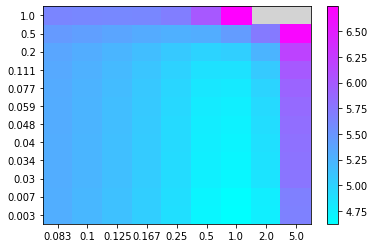

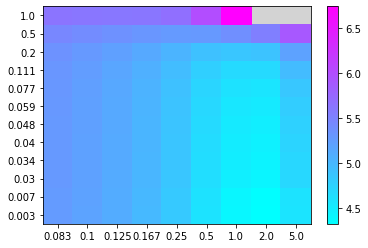

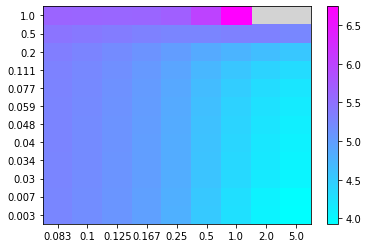

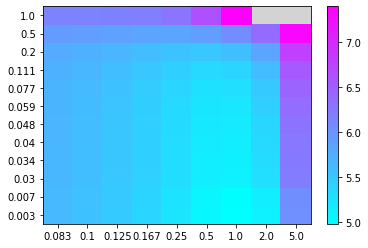

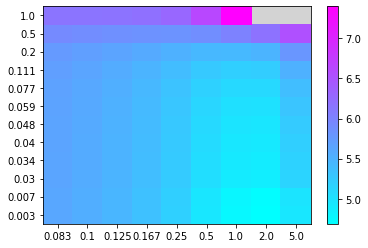

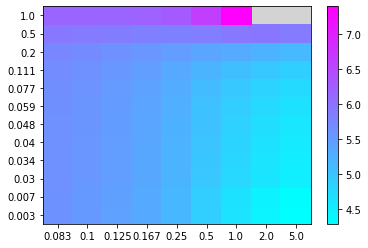

In [3]:
ells = [1/9, 0.05]
d_stars = [1, 0.5, 0.2]
n=256

for ell in ells:
    for d_star in d_stars:
        lb_arr = []

        for q in qs:
            row = []
            for p in lambdas:
                row.append(utils.top_down_theory_bound(p, q, ell, n, d_star, 0.1))
            lb_arr.append(row)

        lb_arr_df = pd.DataFrame(lb_arr)
        lb_arr_df.index = [round(i, 3) for i in qs]
        lb_arr_df.columns = [round(i, 3) for i in lambdas]

        lb_arr_df.loc[1.0, 5.0] = np.NaN
        lb_arr_df.loc[1.0, 2.0] = np.NaN

        plt.pcolor(lb_arr_df.applymap(lambda x: np.log10(x)), cmap = 'cool')
        plt.colorbar()
        plt.yticks(np.arange(0.5, len(lb_arr_df.index), 1), lb_arr_df.index)
        plt.xticks(np.arange(0.5, len(lb_arr_df.columns), 1), lb_arr_df.columns)
        
        ax = plt.axes()
        ax.set(facecolor = "lightgrey")
        plt.savefig(f"../Figures/Fig2/theory_heatmaps/ell_{ell}_d_star_{d_star}.eps", format='eps')
        plt.show()

Generate the heatmaps showing the theoretical sufficient k for the bottom-up algorithm, used in the figure 3.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


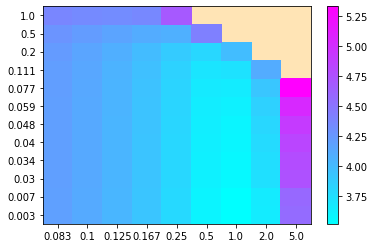

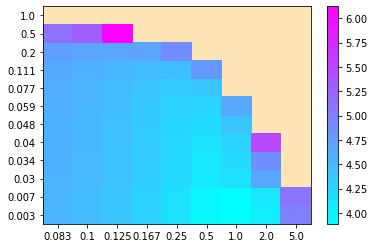

In [15]:
ells = [1/9, 0.05]
n=256
margin = 0.9999

for ell in ells:
    lb_arr = []
    
    if ell == 1/9:
        c = 1/9
    elif ell == 0.05:
        c = (np.log(1 - margin) / -23.697339506322916 + ell)**2 / ell

    for q in qs:
        row = []
        for p in lambdas:
            row.append(utils.bottom_up_theory_bound(p,q,ell,n,c, 0.1))
        lb_arr.append(row)

    lb_arr_df = pd.DataFrame(lb_arr)
    lb_arr_df.index = [round(i, 3) for i in qs]
    lb_arr_df.columns = [round(i, 3) for i in lambdas]

    plt.pcolor(lb_arr_df.applymap(lambda x: np.log10(x)), cmap = 'cool')
    plt.colorbar()
    plt.yticks(np.arange(0.5, len(lb_arr_df.index), 1), lb_arr_df.index)
    plt.xticks(np.arange(0.5, len(lb_arr_df.columns), 1), lb_arr_df.columns)

    ax = plt.axes()
    ax.set(facecolor = "moccasin")
    plt.savefig(f"../Figures/Fig3/theory_heatmaps/ell_{ell}.eps", format='eps')
    plt.show()

The following generates the heatmaps showing the minimum necessary k found in simulation for the threshold algorithm, used in figure 2.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


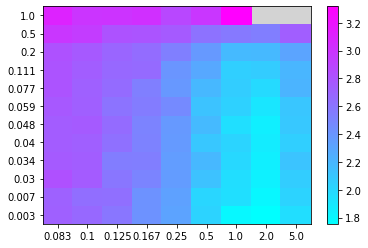

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


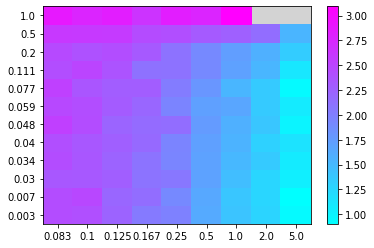

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


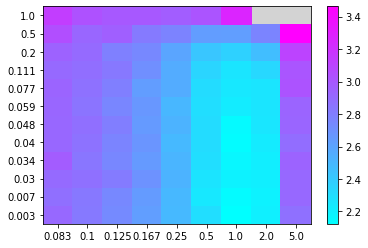

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


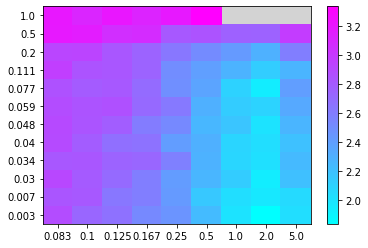

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


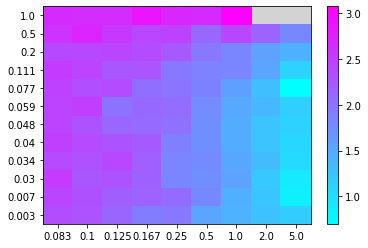

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


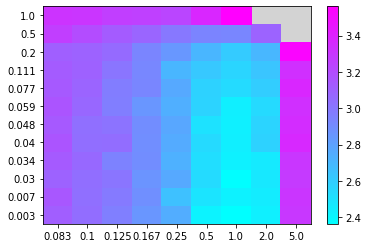

In [16]:
algo = "percolation"

regimes = ["complete_binary", "exponential_plus_c"]
metrics = ["d_triplets", "d_triplets_20", "rf"]


for regime in regimes:
    for metric in metrics:
        df = pd.read_csv(f"{folder}/{regime}/{algo}_{metric}.txt", sep= "\t", header = None)
        df = df.drop(columns = 3)
        df.columns = [0, 1, 2, 3]
        spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
        spline_df.columns = ["value"]
        pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
        pivot_table.index = [round(i, 3) for i in pivot_table.index]
        pivot_table.columns = [round(i, 3) for i in pivot_table.columns]
        color2 = plt.pcolormesh(pivot_table.applymap(lambda x: np.log10(x)), cmap = 'cool')
        plt.yticks(np.arange(0.5, len(pivot_table.index), 1), labels = pivot_table.index)
        plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), labels = pivot_table.columns)

        ax = plt.axes()
        ax.set(facecolor = "lightgrey")
        plt.colorbar(color2)
        plt.savefig(f"../Figures/Fig2/empirical_heatmaps/{regime}_{metric}.eps", format='eps')
        plt.show()

The following generates the heatmaps showing the minimum necessary k found in simulation for the bottom-up algorithm, used in figure 3.

/data/yosef2/users/richardz/anaconda2/envs/python3_6/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


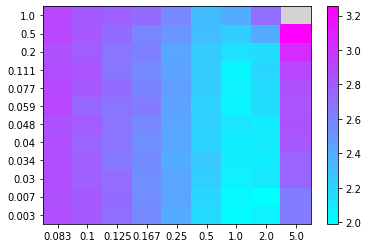

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


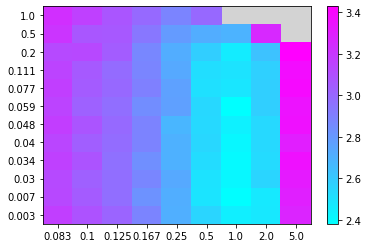

In [17]:
algo = "shared_mutation"

regimes = ["complete_binary", "exponential_plus_c"]
metric = "rf"


for regime in regimes:
    df = pd.read_csv(f"{folder}/{regime}/{algo}_{metric}.txt", sep= "\t", header = None)
    df = df.drop(columns = 3)
    df.columns = [0, 1, 2, 3]
    spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
    spline_df.columns = ["value"]
    pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
    pivot_table.index = [round(i, 3) for i in pivot_table.index]
    pivot_table.columns = [round(i, 3) for i in pivot_table.columns]
    color2 = plt.pcolormesh(pivot_table.applymap(lambda x: np.log10(x)), cmap = 'cool')
    plt.yticks(np.arange(0.5, len(pivot_table.index), 1), labels = pivot_table.index)
    plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), labels = pivot_table.columns)

    ax = plt.axes()
    ax.set(facecolor = "lightgrey")
    plt.colorbar(color2)
    plt.savefig(f"../Figures/Fig3/empirical_heatmaps/{regime}_{metric}.eps", format='eps')
    plt.show()

The following generates the heatmaps showing the minimum necessary k found in simulation for >0.95% triplets correct metric, used in figure 8.

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


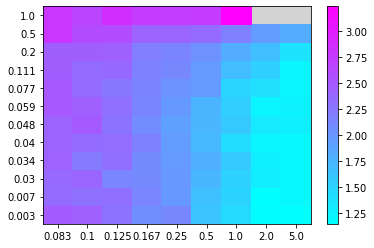

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


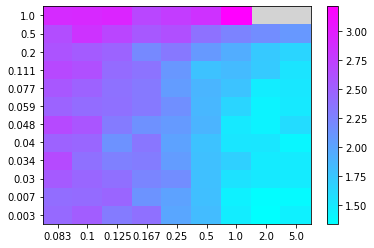

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


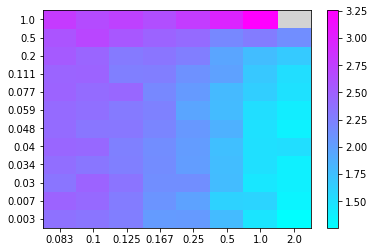

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


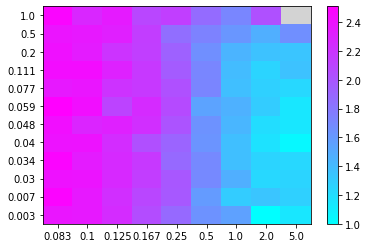

/home/eecs/richardyz98/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


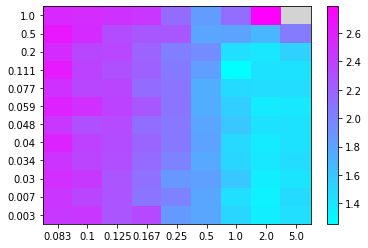

In [18]:
algos = ["percolation", "shared_mutation"]

regimes = ["complete_binary", "exponential_plus_c", "missing"]
metric = "triplets"

for algo in algos:
    for regime in regimes:
        
        if algo == "shared_mutation" and regime == "missing":
            continue
        
        df = pd.read_csv(f"{folder}/{regime}/{algo}_{metric}.txt", sep= "\t", header = None)
        df = df.drop(columns = 3)
        df.columns = [0, 1, 2, 3]
        spline_df = df.sort_values(2).set_index([0, 1]).groupby([0, 1]).apply(utils.logistic_spline).to_frame()
        spline_df.columns = ["value"]
        pivot_table = pd.pivot_table(spline_df, values="value", index=[0], columns=[1])
        pivot_table.index = [round(i, 3) for i in pivot_table.index]
        pivot_table.columns = [round(i, 3) for i in pivot_table.columns]
        color2 = plt.pcolormesh(pivot_table.applymap(lambda x: np.log10(x)), cmap = 'cool')
        plt.yticks(np.arange(0.5, len(pivot_table.index), 1), labels = pivot_table.index)
        plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), labels = pivot_table.columns)

        ax = plt.axes()
        ax.set(facecolor = "lightgrey")
        plt.colorbar(color2)
        plt.savefig(f"../Figures/Fig8/{algo}_{regime}_{metric}.eps", format='eps')
        plt.show()